In [1]:
from src.solver_results.results_dataset import VRPTableDataset
from src.solver_results.vrp_instance import VRPInstance
from src.solver_results.pca_analysis import PCAAnalyzer
from src.solver_results.classification_analysis import ClassificationAnalyzer
from src.solver_results.first_valid_dataset import FirstValidDataset

import pandas as pd
import numpy as np

In [2]:
def load_vrp_instances(path, instance_range, until_first_valid=False):
    """Load VRP instances from CSV files."""
    instances = []

    for i in instance_range:
        filename = f"instance_{i}.csv"
        try:
            df = pd.read_csv(f"{path}/{filename}")

            instance = VRPInstance(i, df, until_first_valid=until_first_valid)
            instances.append(instance)
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    return instances


def run_pca_analysis(X, Y, feature_cols):
    """Run PCA analysis."""
    print("\n" + "=" * 50)
    print("PCA ANALYSIS")
    print("=" * 50)

    pca_analyzer = PCAAnalyzer()
    pca_analyzer.plot_analysis(X, Y, feature_cols)

    # Find optimal components
    optimal_components, results_df = pca_analyzer.find_optimal_components(X, Y)

    return pca_analyzer


def run_classification_analysis(X, Y, feature_cols):
    """Run classification analysis."""
    print("\n" + "=" * 50)
    print("CLASSIFICATION ANALYSIS")
    print("=" * 50)

    classifier_analyzer = ClassificationAnalyzer()

    # Analyze with original features
    results_original = classifier_analyzer.run_analysis(
        X, Y, feature_cols, "Original Features"
    )

    # Analyze with PCA features
    pca_analyzer = PCAAnalyzer()
    X_pca, pca_reduced = pca_analyzer.get_pca_features(X, n_components=0.95)
    pca_feature_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

    results_pca = classifier_analyzer.run_analysis(
        X_pca, Y, pca_feature_names, f"PCA Features ({X_pca.shape[1]} components)"
    )

    return results_original, results_pca





In [3]:
path = "output/resnet_1_1_2e-07_version2"

VRPInstances = load_vrp_instances(path, range(1001, 1076), False)

    # Define features
feature_cols = [
    "entropy_score",
    "classifier_score",
    # "iter",
    "entropy_variation",
    "classifier_score_variation",
    "top_arc_value",
    "top_3_arcs",
    "top_arc_variation",
    "top_3_arcs_variation",
]

# Create dataset
dataset = VRPTableDataset(
    vrp_instances=VRPInstances,
    feature_cols=feature_cols,
    # target_col="first_time_valid",
    target_col="valid"
)

first_valid_dataset = FirstValidDataset(VRPInstances)

X, Y = dataset.get_sklearn_inputs()

Cost difference computed and added to dataset.



PCA ANALYSIS


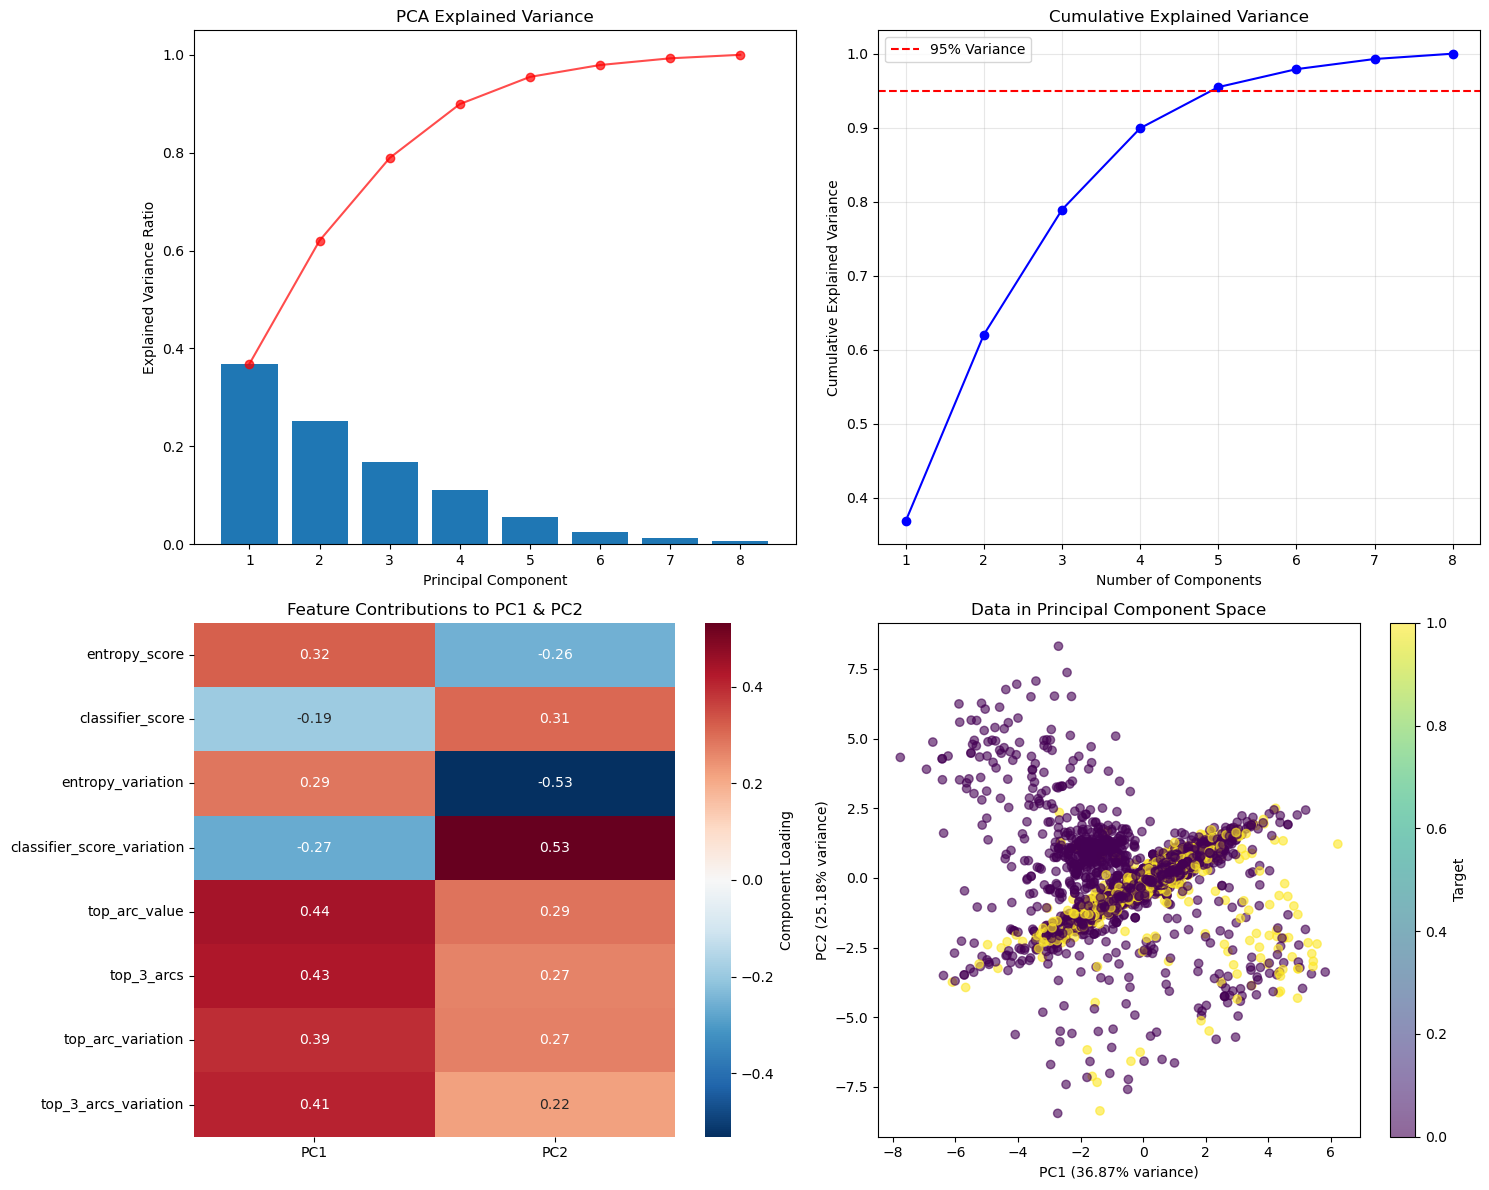


=== PCA Analysis Results ===
Total variance explained by first 2 components: 62.05%
Total variance explained by first 3 components: 78.93%

Most important features for PC1:
top_arc_value                 0.441207
top_3_arcs                    0.432010
top_3_arcs_variation          0.411713
top_arc_variation             0.393675
entropy_score                 0.319859
entropy_variation             0.287188
classifier_score_variation    0.268214
classifier_score              0.193628
dtype: float64

Most important features for PC2:
classifier_score_variation    0.532455
entropy_variation             0.531705
classifier_score              0.307487
top_arc_value                 0.289865
top_arc_variation             0.267730
top_3_arcs                    0.265329
entropy_score                 0.256997
top_3_arcs_variation          0.216992
dtype: float64


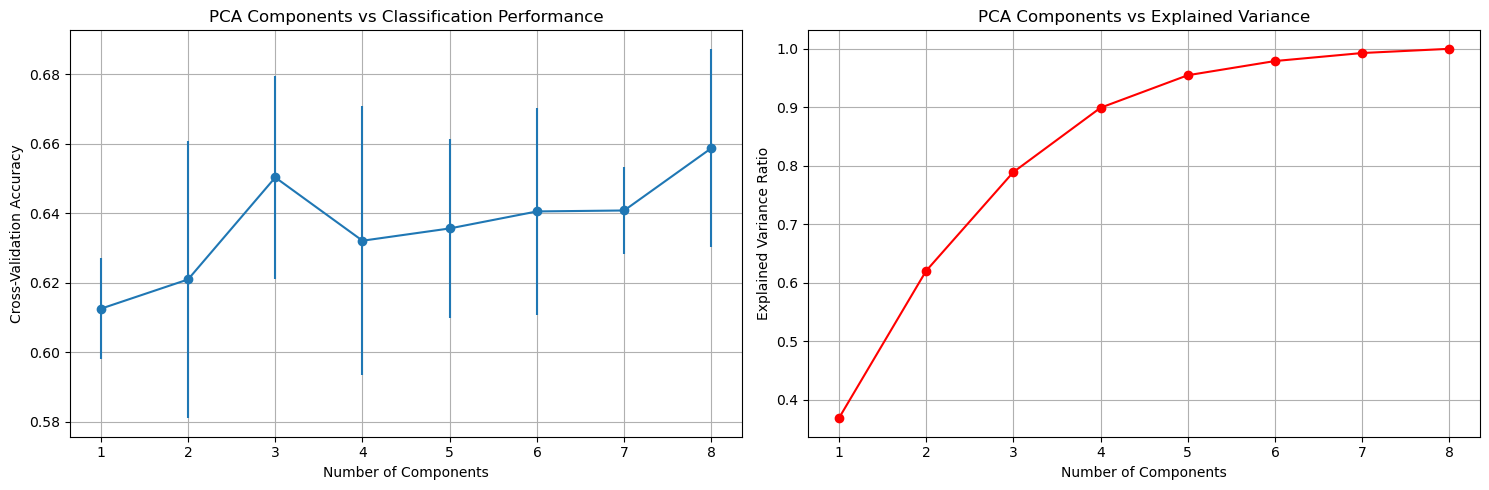

Optimal number of components: 8.0
Best accuracy: 0.659


In [4]:
run_pca_analysis(X, Y, feature_cols)


CLASSIFICATION ANALYSIS

Original Features:

Random Forest:
  Test Accuracy: 0.695
  CV Accuracy: 0.701 (+/- 0.013)
  ROC AUC: 0.720
  Confusion Matrix:
[[1037  307]
 [ 253  241]]

Gradient Boosting:
  Test Accuracy: 0.733
  CV Accuracy: 0.733 (+/- 0.043)
  ROC AUC: 0.730
  Confusion Matrix:
[[1246   98]
 [ 392  102]]

SVM:
  Test Accuracy: 0.410
  CV Accuracy: 0.406 (+/- 0.014)
  ROC AUC: 0.636
  Confusion Matrix:
[[ 264 1080]
 [   5  489]]

Logistic Regression:
  Test Accuracy: 0.522
  CV Accuracy: 0.489 (+/- 0.055)
  ROC AUC: 0.647
  Confusion Matrix:
[[577 767]
 [112 382]]

Decision Tree:
  Test Accuracy: 0.544
  CV Accuracy: 0.494 (+/- 0.084)
  ROC AUC: 0.650
  Confusion Matrix:
[[618 726]
 [113 381]]

Best Classifier: Gradient Boosting

Feature Importance (Gradient Boosting):
  entropy_score: 0.1983
  classifier_score: 0.1896
  top_3_arcs: 0.1233
  top_arc_value: 0.1182
  classifier_score_variation: 0.1152
  entropy_variation: 0.0961
  top_3_arcs_variation: 0.0844
  top_arc_vari

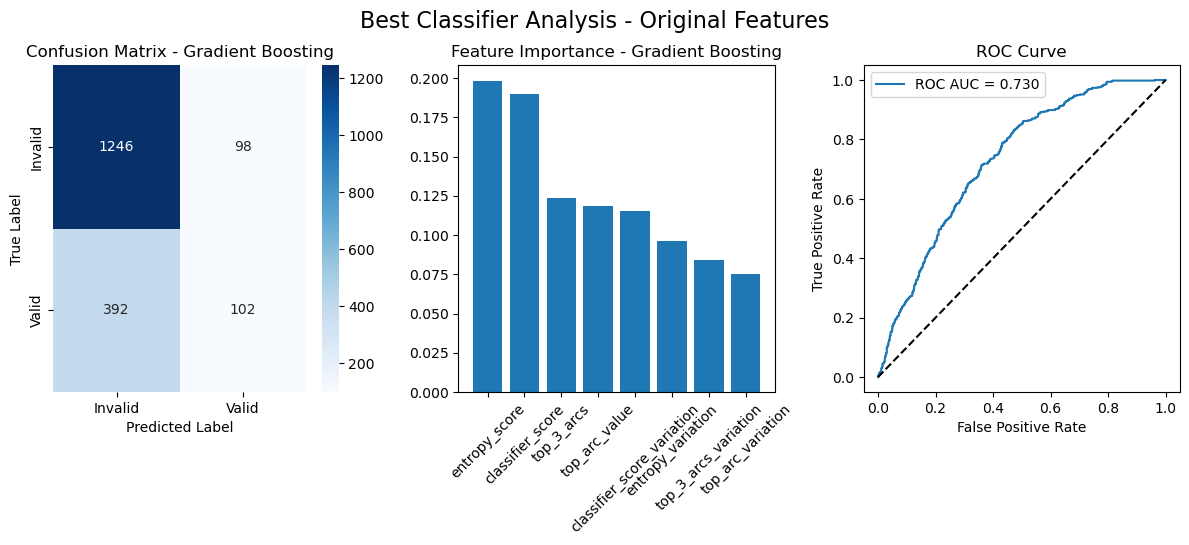

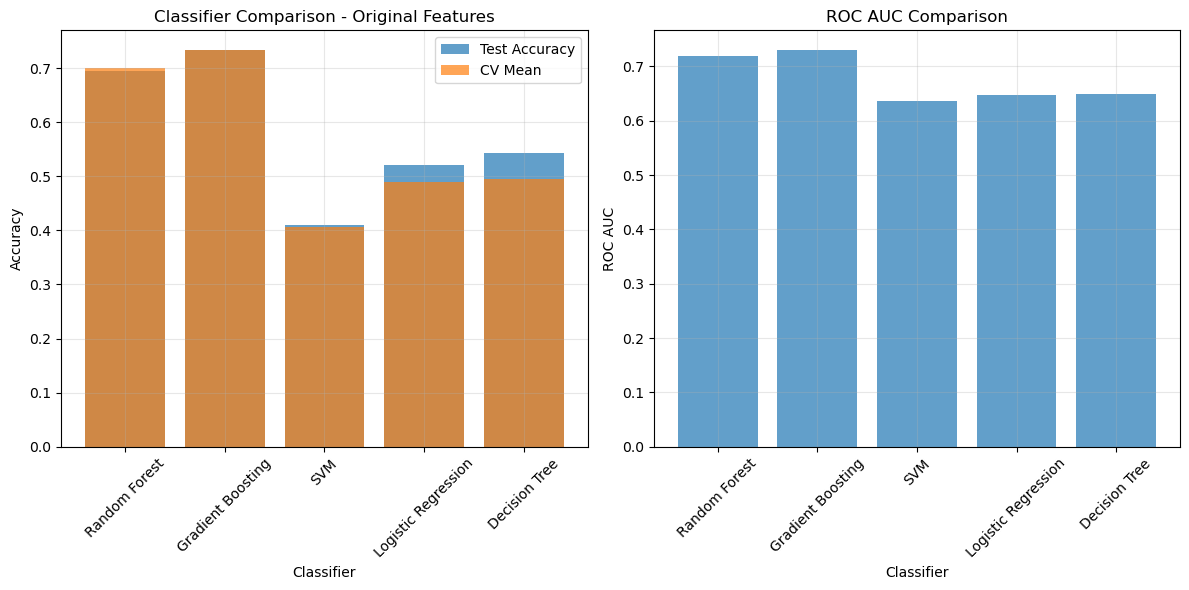


Classifier Comparison - Original Features:
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.695    0.701   0.006    0.720
  Gradient Boosting          0.733    0.733   0.021    0.730
                SVM          0.410    0.406   0.007    0.636
Logistic Regression          0.522    0.489   0.028    0.647
      Decision Tree          0.544    0.494   0.042    0.650

PCA Features (5 components):

Random Forest:
  Test Accuracy: 0.671
  CV Accuracy: 0.661 (+/- 0.060)
  ROC AUC: 0.684
  Confusion Matrix:
[[1002  342]
 [ 262  232]]

Gradient Boosting:
  Test Accuracy: 0.714
  CV Accuracy: 0.704 (+/- 0.020)
  ROC AUC: 0.695
  Confusion Matrix:
[[1227  117]
 [ 409   85]]

SVM:
  Test Accuracy: 0.489
  CV Accuracy: 0.461 (+/- 0.051)
  ROC AUC: 0.655
  Confusion Matrix:
[[466 878]
 [ 61 433]]

Logistic Regression:
  Test Accuracy: 0.508
  CV Accuracy: 0.475 (+/- 0.046)
  ROC AUC: 0.636
  Confusion Matrix:
[[549 795]
 [110 384]]

Decision Tree:
  Test A

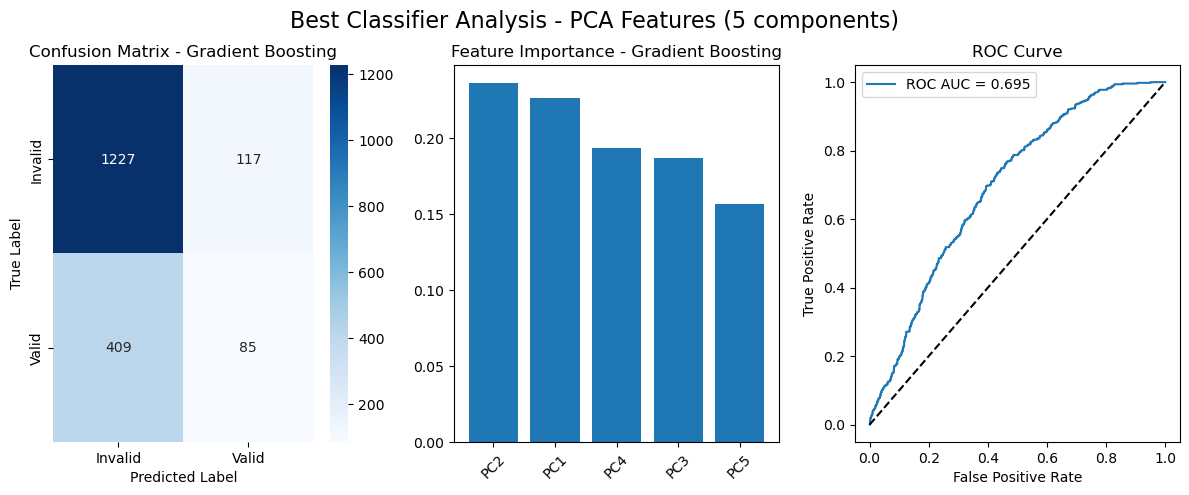

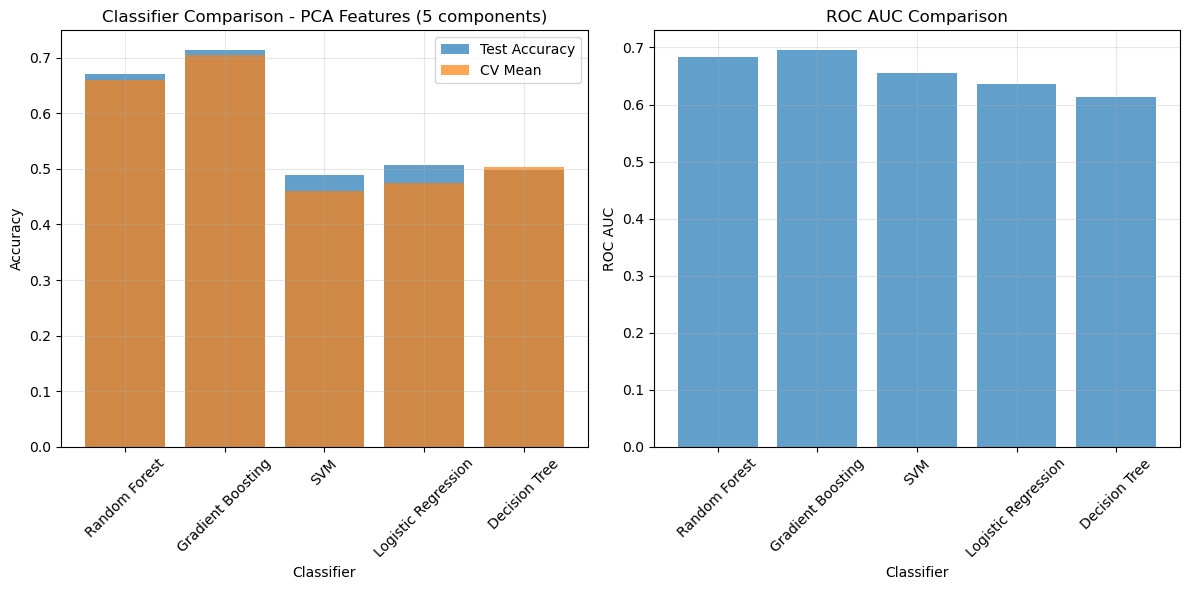


Classifier Comparison - PCA Features (5 components):
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.671    0.661   0.030    0.684
  Gradient Boosting          0.714    0.704   0.010    0.695
                SVM          0.489    0.461   0.026    0.655
Logistic Regression          0.508    0.475   0.023    0.636
      Decision Tree          0.498    0.503   0.058    0.613


({'Random Forest': {'accuracy': 0.6953210010881393,
   'cv_mean': 0.7011447103423765,
   'cv_std': 0.006440492841711752,
   'confusion_matrix': array([[1037,  307],
          [ 253,  241]], dtype=int64),
   'classifier': RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42),
   'roc_auc': 0.7196303559379217,
   'predictions': array([False, False, False, ..., False, False, False]),
   'probabilities': array([0.28782022, 0.36141533, 0.36248948, ..., 0.4390014 , 0.0689105 ,
          0.31733604]),
   'Y_test': array([False, False, False, ..., False, False,  True])},
  'Gradient Boosting': {'accuracy': 0.7334058759521219,
   'cv_mean': 0.7332469494135766,
   'cv_std': 0.021456455228720726,
   'confusion_matrix': array([[1246,   98],
          [ 392,  102]], dtype=int64),
   'classifier': GradientBoostingClassifier(max_depth=5, random_state=42),
   'roc_auc': 0.730031960911895,
   'predictions': array([False, False, False, ..., False, False, False]),
   'probabiliti

In [5]:
run_classification_analysis(X, Y, feature_cols)

In [6]:
first_valid_dataset.print_summary()

FIRST VALID DATASET SUMMARY
Total VRP instances: 75
Instances with first valid: 67
Instances without valid: 8
Success rate: 89.3%

First Valid Iteration Statistics:
  Average iteration to first valid: 8.6
  Min iteration to first valid: 2.0
  Max iteration to first valid: 44.0

Cost Statistics (first valid):
  Average solver cost difference : -0.32
  Average easy cost difference: 0.31
